# The `QuantumState` class

Express an N-qubit quantum state as an array of N columns, where rows are binary bit values, complemented by a vector of coefficients. Note the similarity with the symplectic representation - indeed, the QuantumState class will infact set the above array as the X block in a PauliwordOp, with the Z block its complement.

What we are doing here is writing $|0\rangle = Z|0\rangle$ and $|1\rangle = X|0\rangle$, which ensures correct phases when multiplying the state by Pauli operators, since

$$X|0\rangle = XZ|0\rangle = -iY|0\rangle = |1\rangle,\; X|1\rangle = XX|0\rangle = |0\rangle$$
$$Y|0\rangle = YZ|0\rangle = iX|0\rangle = i|1\rangle,\; Y|1\rangle = YX|0\rangle = -iZ|0\rangle = -i|0\rangle$$
$$Z|0\rangle = ZZ|0\rangle = |0\rangle,\; Z|1\rangle = ZX|0\rangle = iY|0\rangle = -|1\rangle$$

Finally, we have $$| \vec{b} \rangle = \bigotimes_{i=1}^N \big(b_i X + (1-b_i) Z\big) | \vec{0} \rangle$$ and we may drop the zero vector and use the functionality of PauliwordOp to manipulate quantum states. In this represenation, a quantum state is stored as an operator consisting of Paulis $X, Z$, which is implicitly applied to the zero (or vacuum) state. 

In [1]:
import numpy as np
from symmer import PauliwordOp, QuantumState

Firstly, note the correct phases under multiplication by a Pauli Y:

In [2]:
zero = QuantumState([[0]])
one = QuantumState([[1]])
Y = PauliwordOp.from_list(['Y'], [1])

print(f'{zero} -> {Y * zero}')
print(f'{one} -> {Y * one}')

 1.000+0.000j |0> ->  0.000+1.000j |1>
 1.000+0.000j |1> ->  0.000-1.000j |0>


Now, let's see what happens when we apply the Hadamard gate to the zero state:

In [3]:
from symmer.evolution import Had
psi = QuantumState([[0,0]])
H = Had(1, 0)
HH = H.tensor(H)
eq_superposition = HH * psi
print(f'Zero state: {psi}\n')
print(f'After application of a Hadamard gate on each qubit position:\n\n{eq_superposition}')

Zero state:  1.000+0.000j |00>

After application of a Hadamard gate on each qubit position:

 0.500+0.000j |00> +
 0.500+0.000j |01> +
 0.500+0.000j |10> +
 0.500-0.000j |11>


Observe that the QuantumState is represented internally by its `state_op`, a PauliwordOp object that governs its behaviour under multiplication

In [4]:
print(eq_superposition.state_op)

 0.500+0.000j ZZ +
 0.500+0.000j ZX +
 0.500+0.000j XZ +
 0.500-0.000j XX


Try evaluating expectation values for randomly generated states and Hermitian operators:

In [5]:
N = 5 # number of qubits
M = 10 # number of terms

psi_1 = QuantumState.random(N, M)
psi_2 = QuantumState.random(N, M)

print(psi_1)
print()
print(psi_2)

 0.234+0.220j |10000> +
 0.318+0.160j |00100> +
 0.033+0.253j |00001> +
 0.317+0.079j |01110> +
 0.342+0.143j |01001> +
 0.262+0.193j |10001> +
 0.285+0.098j |10110> +
 0.330+0.089j |11110> +
 0.343+0.048j |10111> +
 0.150+0.062j |01010>

 0.300+0.372j |11110> +
 0.334+0.137j |11001> +
 0.292+0.080j |11110> +
 0.022+0.151j |01111> +
 0.181+0.315j |11100> +
 0.091+0.011j |01010> +
 0.245+0.067j |00101> +
 0.166+0.036j |00011> +
 0.211+0.370j |00011> +
 0.308+0.124j |00101>


In [6]:
psi = (psi_1 + psi_2).normalize
print(psi)
print()
print('Norm:', psi.dagger * psi)

 0.019+0.146j |00001> +
 0.218+0.235j |00011> +
 0.183+0.092j |00100> +
 0.319+0.110j |00101> +
 0.197+0.082j |01001> +
 0.139+0.042j |01010> +
 0.183+0.046j |01110> +
 0.012+0.087j |01111> +
 0.135+0.127j |10000> +
 0.151+0.111j |10001> +
 0.165+0.057j |10110> +
 0.198+0.027j |10111> +
 0.193+0.079j |11001> +
 0.105+0.182j |11100> +
 0.533+0.312j |11110>

Norm: (1+0j)


We may also generate haar-random states, although this is more computationally expensive due to an internal QR-decomposition.

In [7]:
psi = QuantumState.haar_random(N)
print(psi)

-0.216+0.023j |00000> +
 0.062+0.007j |00001> +
-0.036-0.137j |00010> +
 0.135-0.116j |00011> +
 0.228+0.058j |00100> +
-0.063+0.010j |00101> +
 0.239+0.082j |00110> +
 0.155+0.079j |00111> +
-0.066+0.065j |01000> +
-0.018+0.245j |01001> +
-0.135+0.156j |01010> +
-0.116+0.227j |01011> +
-0.157+0.002j |01100> +
 0.081+0.146j |01101> +
-0.028-0.082j |01110> +
-0.038+0.109j |01111> +
 0.051+0.196j |10000> +
 0.136-0.224j |10001> +
-0.076-0.024j |10010> +
-0.055-0.202j |10011> +
 0.044+0.015j |10100> +
 0.140+0.054j |10101> +
 0.122-0.120j |10110> +
-0.096+0.158j |10111> +
-0.178-0.237j |11000> +
-0.128+0.002j |11001> +
 0.015+0.146j |11010> +
 0.034+0.134j |11011> +
 0.107-0.088j |11100> +
 0.110-0.055j |11101> +
 0.109+0.139j |11110> +
 0.065+0.176j |11111>


In [8]:
print('Generate a random Hermitian operator:\n')
op = PauliwordOp.random(N, 10, complex_coeffs=False)
print(op)
print()
print('Expectation value <psi|op|psi> =', (psi.dagger * op * psi).real)

Generate a random Hermitian operator:

-0.520+0.000j ZYIIZ +
-2.074+0.000j ZXIII +
 0.341+0.000j YIZZZ +
-0.162+0.000j XXIZI +
-1.092+0.000j ZXIXI +
-0.319+0.000j ZIXII +
 0.133+0.000j IIXYI +
-1.192+0.000j XIZXI +
-0.447+0.000j ZIIIX +
 0.508+0.000j IXXII

Expectation value <psi|op|psi> = 0.29965048002600725


It is also possible to convert from a $2^N$ dimensional statevector over $N$ qubits to a `QuantumState` object, via the `from_array` initialization method:

In [9]:
statevector = np.zeros(2**10).reshape([-1,1])
statevector[0]   = np.sqrt(1/6)
statevector[250] = np.sqrt(2/6)
statevector[500] = np.sqrt(3/6)
psi = QuantumState.from_array(statevector)
print(psi)
print(psi.dagger * psi)

 0.408+0.000j |0000000000> +
 0.577+0.000j |0011111010> +
 0.707+0.000j |0111110100>
(1+0j)


# Manipulating Quantum Measurement Data

Given a dictionary of measurement outcomes from a quantum experiment, we may intialize a QuantumState for further postprocessing.

- Dictionary given as: 
    - key=bitstring
    - value=number of occurences or relative frequency

In [10]:
measurement_data = {
    '0101':4,
    '1101':10,
    '0001':20,
    '1111':16
}

psi_measured = QuantumState.from_dictionary(measurement_data)
psi_measured

 4.000+0.000j |0101> +
 10.000+0.000j |1101> +
 20.000+0.000j |0001> +
 16.000+0.000j |1111>

The coefficients here are the number of occurences of each output bitstring. These may be normalized using `normalize_counts` to ensure the correct probability distrubution is preserved:

 0.283+0.000j |0101> +
 0.447+0.000j |1101> +
 0.632+0.000j |0001> +
 0.566+0.000j |1111>


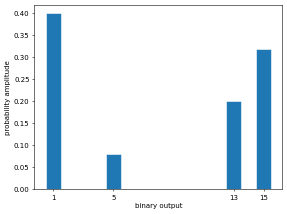

In [11]:
print(psi_measured.normalize_counts)
ax = psi_measured.normalize_counts.plot_state(dpi=50)

This is __not__ the same as taking the $L^2$-norm - the probability distrubtions do not align.

 0.144+0.000j |0101> +
 0.360+0.000j |1101> +
 0.720+0.000j |0001> +
 0.576+0.000j |1111>


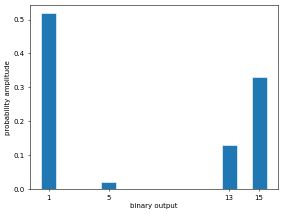

In [12]:
print(psi_measured.normalize)
# this shouldn't be used for normalizing quantum experiment data
# ... but functionality is still useful for normalizing states in the general setting
ax = psi_measured.normalize.plot_state(dpi=50)

# State sampling

It is also possible to randomly sample the state, just like a quantum experiment - this is particularly useful for the purposes of bootstrapping for statistical analysis of quantum experiments.

In [13]:
psi_measured_normalized = psi_measured.normalize_counts
psi_measured_normalized.sample_state(n_samples=50, return_normalized=True)

 0.283+0.000j |0101> +
 0.548+0.000j |1101> +
 0.566+0.000j |0001> +
 0.548+0.000j |1111>

Given enough samples, the original state will be reproduced exactly:

In [14]:
for n_samples in 2**np.arange(0, 30, 2):
    psi_sampled = psi_measured_normalized.sample_state(n_samples=n_samples, return_normalized=True)
    print(f'With n_samples={n_samples: <10}, <psi_sampled|psi_true> = {psi_sampled.dagger * psi_measured_normalized}')

With n_samples=1         , <psi_sampled|psi_true> = (0.6324555320336759+0j)
With n_samples=4         , <psi_sampled|psi_true> = (0.8061257145734735+0j)
With n_samples=16        , <psi_sampled|psi_true> = (0.9486832980505138+0j)
With n_samples=64        , <psi_sampled|psi_true> = (0.9974303632835613+0j)
With n_samples=256       , <psi_sampled|psi_true> = (0.9979879795972817+0j)
With n_samples=1024      , <psi_sampled|psi_true> = (0.9998909942135219+0j)
With n_samples=4096      , <psi_sampled|psi_true> = (0.9999844502269415+0j)
With n_samples=16384     , <psi_sampled|psi_true> = (0.9999981846219373+0j)
With n_samples=65536     , <psi_sampled|psi_true> = (0.9999977785102031+0j)
With n_samples=262144    , <psi_sampled|psi_true> = (0.9999999524729822+0j)
With n_samples=1048576   , <psi_sampled|psi_true> = (0.999999442200801+0j)
With n_samples=4194304   , <psi_sampled|psi_true> = (0.9999999571813452+0j)
With n_samples=16777216  , <psi_sampled|psi_true> = (0.9999999696791979+0j)
With n_sample

# Plotting probabillity amplitudes of quantum state

In [15]:
%matplotlib inline
random_state = QuantumState.haar_random(3, vec_type='ket')
print(random_state)

-0.196-0.215j |000> +
-0.151+0.151j |001> +
 0.125+0.132j |010> +
 0.181+0.156j |011> +
 0.305-0.386j |100> +
 0.132-0.356j |101> +
-0.392+0.192j |110> +
-0.306-0.330j |111>


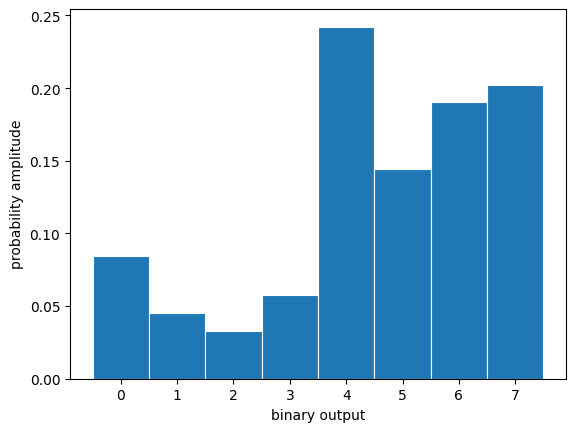

In [16]:
ax = random_state.plot_state(dpi=100)

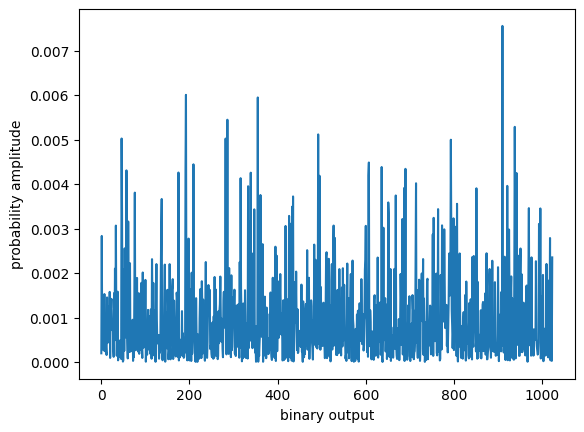

In [17]:
%matplotlib inline
random_large_state = QuantumState.haar_random(10, vec_type='ket')
ax2 = random_large_state.plot_state(logscale=False)

<Axes: xlabel='binary output', ylabel='probability amplitude'>

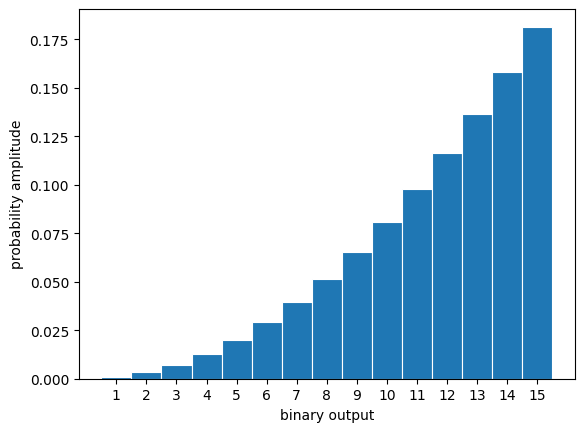

In [18]:
a = np.arange(2**4)
a = a/np.linalg.norm(a)
psi = QuantumState.from_array(a.reshape([-1,1]))
psi.plot_state()

<Axes: xlabel='binary output', ylabel='probability amplitude'>

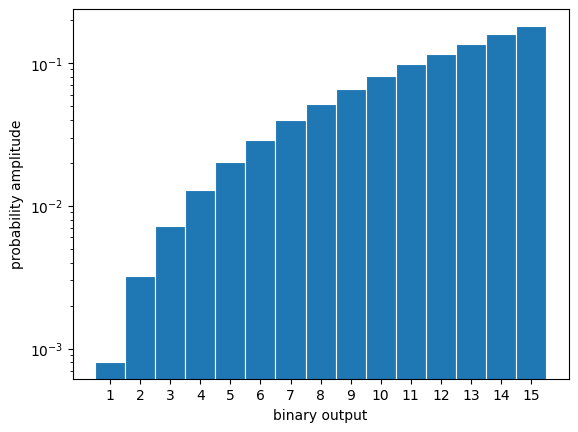

In [19]:
psi.plot_state(logscale=True)

<Axes: xlabel='binary output', ylabel='probability amplitude'>

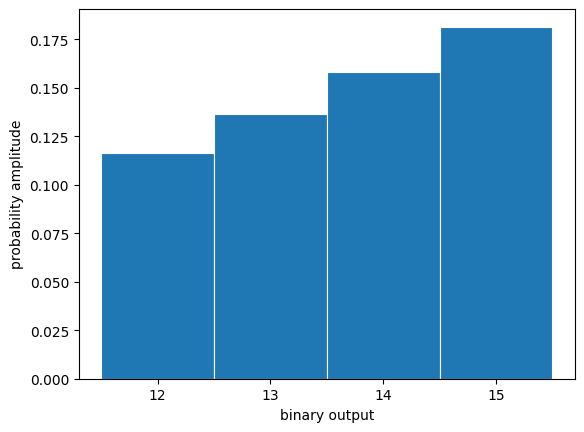

In [20]:
psi.plot_state(probability_threshold=0.1)